In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import calendar
import time
import math

%matplotlib inline

df = pd.DataFrame.from_records(pd.read_json('data/minute/amzn.json')['candles'])

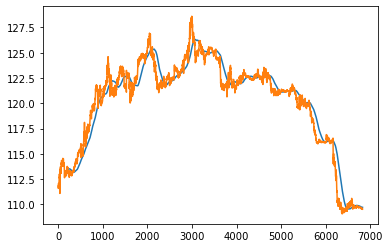

In [289]:
x=[]
n=200
for i in range(len(df)-n):
    x+=[sum(df['low'][i:i+n])/n]
plt.plot([*range(n,len(df['low']))],x)
plt.plot(df['low'][:])

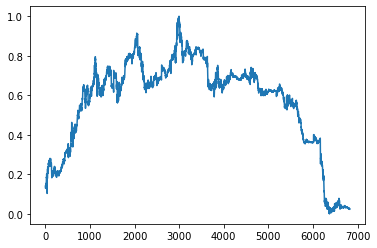

In [290]:
def normalize(v):
    p=[]
    m=max(v)
    n=min(v)
    d=m-n
    for i in range(len(v)):
        p.append((v[i]-n)/d)
    return p

vl=normalize(df['low'])
vh=normalize(df['high'])
plt.plot(vl)

In [291]:
# Gives local min for intervals of n time slots ahead
# O(n)

def findMin(x,v,n):
    i=0
    m=v[i]
    c=0
    index=[]
    value=[]
    for j in range(len(v)-1):
        if v[j+1]>=m:
            c+=1
            if c==n:
                value.append(m)
                index.append(x[i])
                m=v[j+1]
                i=j+1
                c=0
        else:
            c=0
            m=v[j+1]
            i=j+1
            
    for j in range(n-1):
        low=True
        if v[len(v)-1]>v[len(v)-j-2]:
            low=False
    if low==True:
        value.append(v[len(v)-1])
        index.append(x[len(v)-1])
    return index,value

In [292]:
# Gives local max for intervals of n
def findMax(x,v,n):
    i=0
    m=v[i]
    c=0
    index=[]
    value=[]
    for j in range(len(v)-1):
        if v[j+1]<=m:
            c+=1
            if c==n or j+1==len(v)-1:
                value.append(m)
                index.append(x[i])
                m=v[j+1]
                i=j+1
                c=0
        else:
            c=0
            m=v[j+1]
            i=j+1
            
    for j in range(n-1):
        high=True
        if v[len(v)-1]<v[len(v)-j-2]:
            high=False
    if high==True:
        value.append(v[len(v)-1])
        index.append(x[len(v)-1])
    return index,value

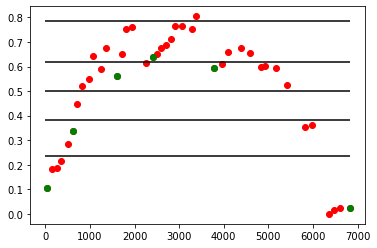

In [293]:
x,y=findMin(range(len(vl)),vl,int(len(vl)/75))
x2,y2=findMin(x,y,5)

plt.scatter(x,y,c='r')
plt.scatter(x2,y2,c='g')

plt.plot()
plt.hlines(.236, 0, len(vh), 'black', '-')
plt.hlines(.382, 0, len(vh), 'black', '-')
plt.hlines(.50, 0, len(vh), 'black', '-')
plt.hlines(.618, 0, len(vh), 'black', '-')
plt.hlines(.786, 0, len(vh), 'black', '-')

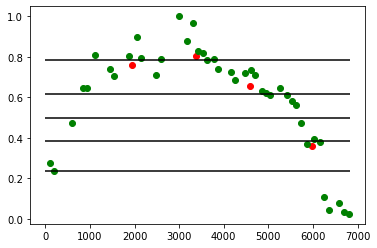

In [294]:
xh,yh=findMax(range(len(vh)),vh,int(len(vh)/75))
x,y=findMax(x,y,5)

plt.scatter(x,y,c='r')
plt.scatter(xh,yh,c='g')
plt.hlines(.236, 0, len(vh), 'black', '-')
plt.hlines(.382, 0, len(vh), 'black', '-')
plt.hlines(.50, 0, len(vh), 'black', '-')
plt.hlines(.618, 0, len(vh), 'black', '-')
plt.hlines(.786, 0, len(vh), 'black', '-')

In [295]:
xl,yl=findMin(range(len(vl)),vl,int(len(vh)/75))
xh,yh=findMax(range(len(vh)),vh,int(len(vh)/75))
print(len(xl))
print(len(xl))

41
41


In [364]:
#O(n+m)

def zipp(lv,hv,liv,hiv,p=0.05):
    c=0
    v=[]
    vi=[]
    li=0
    hi=0
    m=0
    counter = 0
    while li<len(lv) and hi<len(hv):
        m=li
        while liv[li]<hiv[hi]:
            if lv[m]-lv[li]>-p:
                m=li
            li+=1
        v.append(lv[m])
        vi.append(liv[m])

        m=hi
        while hiv[hi]<liv[li]:
            if hv[m]-hv[hi] < p:
                m=hi
            hi+=1
            if hi>=len(hv):
                break
        if hi>=len(hv):
            break
        v.append(hv[m])
        vi.append(hiv[m])
    return vi,v

In [297]:
#O(n)

def unzipp(x,y):
    lv=[]
    hv=[]
    liv=[]
    hiv=[]
    for i in range(len(x)):
        if i%2==0:
            liv.append(x[i])
            lv.append(y[i])
        else:
            hiv.append(x[i])
            hv.append(y[i])  
    return lv,hv,liv,hiv

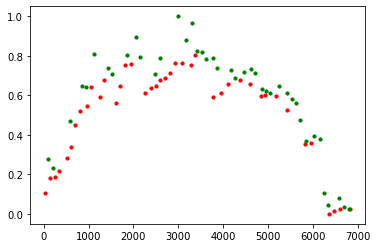

In [298]:
plt.scatter(xl,yl,s=10,c='r')
plt.scatter(xh,yh,s=10,c='g')

In [365]:
X,Y=zipp(yl,yh,xl,xh)
ylow,yhigh,xlow,xhigh=unzipp(X,Y)

In [366]:
len(Y)

51

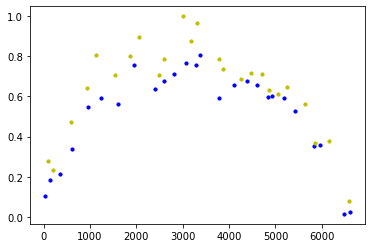

In [367]:
plt.scatter(xlow,ylow,s=10,c='b')
plt.scatter(xhigh,yhigh,s=10,c='y')

In [379]:
def findInc(vec,x,y,change,daysbefore):
    v=[]
    vi=[]
    startendx=[]
    startendy=[]

    veci=[*range(len(vec))]
    for i in range(1,len(x)-1):
        if y[i+1]-y[i]>=change:
            n=x[i]+1
            m=n-daysbefore
            if m>=0:
                v.append(vec[m:n])
                vi.append(veci[m:n])
                startendx.append([x[i],x[i+1]])
                startendy.append([y[i],y[i+1]])
    return v,vi,startendx,startendy

def findDec(vec,x,y,change,daysbefore):
    v=[]
    vi=[]
    startendx=[]
    startendy=[]
    
    veci=[*range(len(vec))]
    for i in range(1,len(x)-1):
        if y[i+1]-y[i]<=change:
            n=x[i]+1
            m=n-daysbefore
            if m>=0:
                v.append(vec[m:n])
                vi.append(veci[m:n])
                startendx.append([x[i],x[i+1]])
                startendy.append([y[i],y[i+1]])
    return v,vi,startendx,startendy

In [380]:
def connect_patterns(x, y, dist):
    xy = [x, y]
    print('BEFORE:')
    for i in x:
        print(len(i))
    for i in range(1, len(x)):
        if len(x[i]) < dist:
            for x in xy:
                matches = (j for j in range(len(x[i]), 0, -1) if x[i-1][:j] == x[i][-j:])
                j = next(matches, 0)
                x[i-1] = x[i-1] + x[i][j:]
    print('AFTER:')
    for i in x:
        print(len(i))

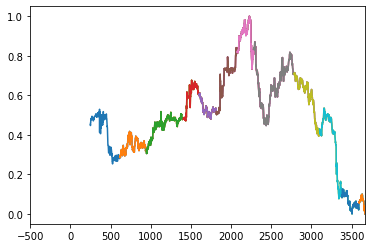

In [383]:
dist = 1000
incy,incx,incsex,incsey=findInc(vh,X,Y,0.025,dist)

for i in range(len(incy)):
    plt.plot(incx[i],incy[i])
    plt.xlim([-500, len(vl)])
    plt.ylim([-0.05, 1.05])

BEFORE:
1000
1000
1000
1000
1000
1000
1000
1000
882
565
289
74
0
0
0
0
AFTER:
1000
1000
1000
1000
1000
1000
1000
1882
1447
854
363
74
0
0
0
0


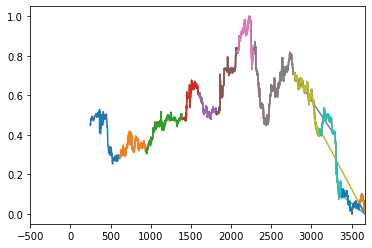

In [382]:
connect_patterns(incx, incy, dist)

for i in range(len(incy)):
    plt.plot(incx[i],incy[i])
    plt.xlim([-500, len(vl)])
    plt.ylim([-0.05, 1.05])

In [384]:
pattern_scale_factor = 3
decy,decx,decsex,decsey=findDec(vl,X,Y,0.05,dist)

In [385]:
connect_patterns(decx, decy, dist)

BEFORE:
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
892
801
565
405
289
193
0
0
0
0
0
0
0
0
0
0
0
0
0
AFTER:
1000
1000
1000
1000
1000
1000
1000
1000
1000
1892
1693
1366
970
694
482
193
0
0
0
0
0
0
0
0
0
0
0
0
0


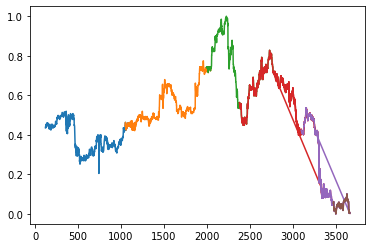

In [386]:
new_decx = []
new_decy = []
for i in range(int(len(decy)/pattern_scale_factor)):
    plt.plot(decx[pattern_scale_factor*i], decy[pattern_scale_factor*i])
    new_decx.append(decx[pattern_scale_factor*i])
    new_decy.append(decy[pattern_scale_factor*i])
    plt.ylim([-0.05, 1.05])
decx = new_decx
decy = new_decy

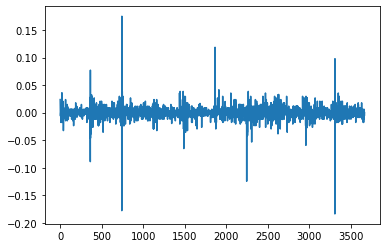

In [387]:
def Differences(v):
    d=[]
    for i in range(len(v)-1):
        d.append(v[i+1]-v[i])
    return d

diff=Differences(vl)
plt.plot(diff)

In [388]:
def findChange(diff,change):
    v=[]
    vi=[]
    while len(v)<
        for i in range(len(diff)):
            if diff[i]>abs(change):
                v.append(diff[i])
                vi.append(i)
    return v,vi

findChange(diff,)

SyntaxError: invalid syntax (3260335131.py, line 4)

In [319]:
import os

In [389]:
dist=1000
charts = []
for filename in os.listdir('data/minute'):
    df = pd.DataFrame.from_records(pd.read_json(os.path.join('data/minute', filename))['candles'])
    if len(df['low']) > dist:
        vl=normalize(df['low'])
        vh=normalize(df['high'])
        X,Y=zipp(yl,yh,xl,xh,0.01)
        pattern_scale_factor = 2
        decy,decx,decsex,decsey=findDec(vl,X,Y,0.05,dist)
        for i in decy:
            charts.append(i)

KeyboardInterrupt: 

In [321]:
import umap.plot as uplt
import umap.umap_ as umap
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
%matplotlib inline

In [390]:
patterns = pd.DataFrame(decy)
patterns = patterns.dropna(axis=0)
patterns

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.483333,0.477778,0.472222,0.466667,0.488889,0.488889,0.488889,0.467667,0.472222,0.472222,...,0.388889,0.388889,0.388889,0.388889,0.388889,0.388889,0.388889,0.388889,0.388889,0.388889
1,0.272222,0.266667,0.266667,0.261111,0.258333,0.258333,0.261111,0.283333,0.277778,0.300000,...,0.672222,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.672222,0.666667,0.666667
2,0.527778,0.522222,0.527778,0.533333,0.522333,0.488889,0.472222,0.466667,0.466667,0.472222,...,0.522222,0.522222,0.500000,0.477778,0.477778,0.477778,0.477778,0.477778,0.500000,0.494444
3,0.383333,0.377778,0.377778,0.383333,0.377778,0.383333,0.377778,0.383333,0.377778,0.377778,...,0.338889,0.372222,0.366667,0.355556,0.344444,0.344444,0.344444,0.338889,0.338889,0.333333
4,0.755556,0.755556,0.755556,0.755667,0.766667,1.000000,1.000000,0.522222,0.511111,0.577778,...,0.443000,0.444444,0.522222,0.511111,0.516667,0.511111,0.500000,0.500000,0.500000,0.500000
5,0.811111,0.811111,0.788889,0.783333,0.788889,0.783333,0.783333,0.777778,0.777778,0.777778,...,0.555556,0.561111,0.544444,0.533333,0.533333,0.555556,0.555556,0.555556,0.555556,0.555556
6,0.338889,0.355556,0.355556,0.355556,0.311111,0.311111,0.311111,0.311111,0.300000,0.300000,...,0.255556,0.244444,0.255556,0.255556,0.255556,0.244444,0.244444,0.244444,0.244444,0.255556
7,0.166667,0.222222,0.211111,0.222222,0.200000,0.233333,0.255556,0.238889,0.250000,0.250000,...,0.411111,0.411111,0.411111,0.411111,0.377778,0.344444,0.355556,0.344444,0.344444,0.350000
8,0.377778,0.355556,0.355556,0.361111,0.355556,0.361111,0.361111,0.361111,0.355556,0.355556,...,0.011111,0.011111,0.000000,0.016667,0.033333,0.038889,0.033333,0.033333,0.033333,0.033333
9,0.344444,0.338889,0.344444,0.338889,0.344444,0.338889,0.338889,0.344444,0.361111,0.377778,...,0.122222,0.127778,0.127778,0.122222,0.127778,0.127778,0.127778,0.127778,0.127778,0.127778


In [391]:
euclidean005 = umap.UMAP(a=None, angular_rp_forest=False, b=None,
          force_approximation_algorithm=False, init='spectral', learning_rate=0.25,
          local_connectivity=1.0, low_memory=False, metric='euclidean',
          metric_kwds=None, min_dist=0.05, n_components=2, n_epochs=1000,
          n_neighbors=2, negative_sample_rate=5, output_metric='euclidean',
          output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
          set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
          target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
          transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

euclidean025 = umap.UMAP(a=None, angular_rp_forest=False, b=None,
          force_approximation_algorithm=False, init='spectral', learning_rate=0.25,
          local_connectivity=1.0, low_memory=False, metric='euclidean',
          metric_kwds=None, min_dist=0.01, n_components=2, n_epochs=1000,
          n_neighbors=2, negative_sample_rate=5, output_metric='euclidean',
          output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
          set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
          target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
          transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

euclidean050 = umap.UMAP(a=None, angular_rp_forest=False, b=None,
          force_approximation_algorithm=False, init='spectral', learning_rate=0.25,
          local_connectivity=1.0, low_memory=False, metric='euclidean',
          metric_kwds=None, min_dist=0.001, n_components=2, n_epochs=1000,
          n_neighbors=2, negative_sample_rate=5, output_metric='euclidean',
          output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
          set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
          target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
          transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

chebyshev005 = umap.UMAP(a=None, angular_rp_forest=False, b=None,
          force_approximation_algorithm=False, init='spectral', learning_rate=0.25,
          local_connectivity=1.0, low_memory=False, metric='chebyshev',
          metric_kwds=None, min_dist=0.05, n_components=2, n_epochs=1000,
          n_neighbors=2, negative_sample_rate=5, output_metric='chebyshev',
          output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
          set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
          target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
          transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

chebyshev025 = umap.UMAP(a=None, angular_rp_forest=False, b=None,
          force_approximation_algorithm=False, init='spectral', learning_rate=0.25,
          local_connectivity=1.0, low_memory=False, metric='chebyshev',
          metric_kwds=None, min_dist=0.01, n_components=2, n_epochs=1000,
          n_neighbors=2, negative_sample_rate=5, output_metric='chebyshev',
          output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
          set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
          target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
          transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

chebyshev050 = umap.UMAP(a=None, angular_rp_forest=False, b=None,
          force_approximation_algorithm=False, init='spectral', learning_rate=0.25,
          local_connectivity=1.0, low_memory=False, metric='chebyshev',
          metric_kwds=None, min_dist=0.001, n_components=2, n_epochs=1000,
          n_neighbors=2, negative_sample_rate=5, output_metric='chebyshev',
          output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
          set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
          target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
          transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

manhattan005 = umap.UMAP(a=None, angular_rp_forest=False, b=None,
          force_approximation_algorithm=False, init='spectral', learning_rate=0.25,
          local_connectivity=1.0, low_memory=False, metric='manhattan',
          metric_kwds=None, min_dist=0.05, n_components=2, n_epochs=1000,
          n_neighbors=2, negative_sample_rate=5, output_metric='manhattan',
          output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
          set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
          target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
          transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

manhattan025 = umap.UMAP(a=None, angular_rp_forest=False, b=None,
          force_approximation_algorithm=False, init='spectral', learning_rate=0.25,
          local_connectivity=1.0, low_memory=False, metric='manhattan',
          metric_kwds=None, min_dist=0.01, n_components=2, n_epochs=1000,
          n_neighbors=2, negative_sample_rate=5, output_metric='manhattan',
          output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
          set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
          target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
          transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

manhattan050 = umap.UMAP(a=None, angular_rp_forest=False, b=None,
          force_approximation_algorithm=False, init='spectral', learning_rate=0.25,
          local_connectivity=1.0, low_memory=False, metric='manhattan',
          metric_kwds=None, min_dist=0.001, n_components=2, n_epochs=1000,
          n_neighbors=2, negative_sample_rate=5, output_metric='manhattan',
          output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
          set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
          target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
          transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

mylist = [euclidean005, euclidean025, euclidean050,
          chebyshev005, chebyshev025, chebyshev050,
          manhattan005, manhattan025, manhattan050]

/Users/glush/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/glush/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/glush/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


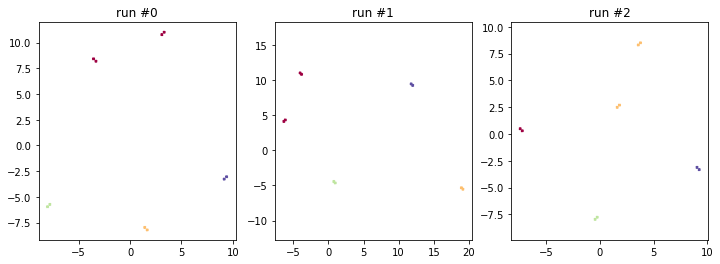

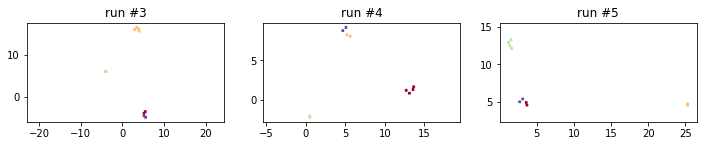

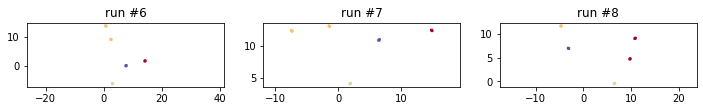

In [392]:
# %matplotlib notebook
results = []
row = 1
for i in range(len(mylist)):
    if i % 3 == 0:
        plt.figure(figsize=(12,4))
    plt.subplot(row, 3, i + 1) # plot position count starts at 1
    reducer = mylist[i]
    reducer.fit(patterns)
    embedding = reducer.transform(patterns)
    assert(np.all(embedding == reducer.embedding_))

    Kmean = KMeans(n_clusters=4, random_state=42)
    Kmean.fit(embedding)
    centers = Kmean.cluster_centers_
    
    plt.scatter(embedding[:, 0], embedding[:, 1], c=Kmean.labels_, cmap='Spectral', s=5, marker='x')
    plt.gca().set_aspect('equal', 'datalim')
    title = 'run #' + str(i)
    plt.title(title, fontsize=12)
    
    results.append(Kmean.labels_)
    if i % 3 == 2:
        row = row + 1

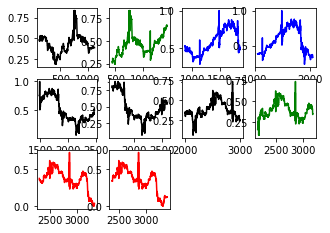

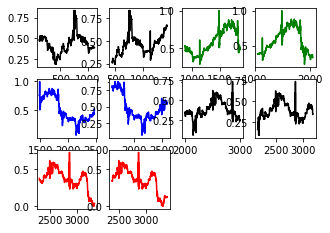

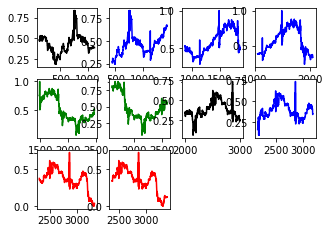

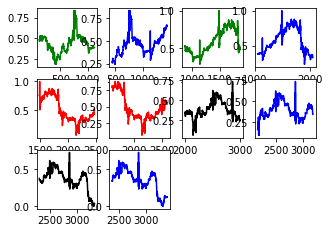

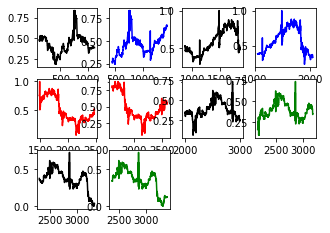

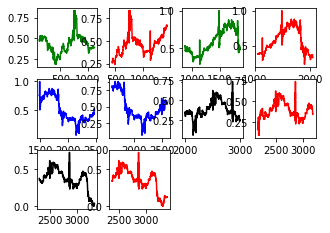

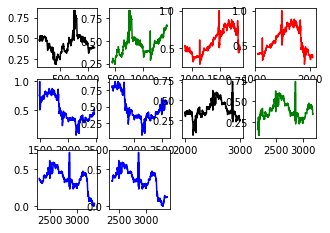

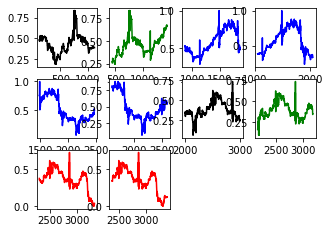

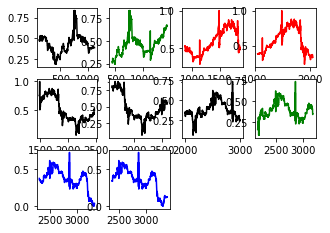

In [393]:
colors = ['black', 'blue', 'red', 'green']
row = 1
for result in results:
    plt.figure(figsize=(5, 5))
    counter = 0
    for i in range(len(patterns)):
        if counter == len(patterns):
            break
        plt.subplot(4, 4, counter + 1) # plot position count starts at 1
        plt.plot(decx[i], decy[i], c=colors[result[counter]])
        counter = counter + 1

In [508]:
def vote_on_labels(labels):
    

In [509]:
vote_on_labels(results)

KeyError: 0